# Stationary Time Series

* https://machinelearningmastery.com/time-series-data-stationary-python/

### 如何用Python 检验平稳性

通常我们讲forecast 预测，简单讲就是利用历史和现状来预测未来，是利用事物特征变量的历史和现状来推测未来可能出现的状况，即假设时间序列的基本特性必须能从过去维持到我们推测的时期，否则，基于历史和现状来预测未来将变得不可靠。时间序列的平稳性，简单理解是时间序列的基本特性维持不变，换句话说，所谓平稳性就是要求由样本时间序列所得到的曲线在未来的一段时期内仍能沿着现有的形态持续下去。很多变量之所以难以估计，是因为这些变量经常发生突变，不是平稳的时间序列。时间序列的平稳性是经典时间序列分析的基本假设前提，只有基于平稳的时间序列进行的预测才是有效的。平稳性有强平稳和弱平稳之分，一般所说的平稳时间序列指的是弱平稳时间序列。


弱平稳（Weakly Stationary）:

弱平稳放宽了平稳性条件，只要求低阶矩平稳，即数学期望（均值）和方差不随时间和位置变化。弱平稳过程的条件是：

（1）均值函数在所有时间上恒为常数；

（2）存在二阶矩；

（3）对于所有时间t和和时滞k，自协方差相同。



检测平稳性的重要性：
* 只有平稳的时间序列才能Apply统计模型以及机器学习模型
* 可以用做图和基本统计来判断是否平稳  (观察时间序列图的形状来初步判断其平稳性)
* 更加科学严谨的方法是做假设检验，这里是用增广fuller办法   (单位根检验。通过观察时序图、自相关和偏自相关图来判断时间序列平稳性，可能出现因观察者对图形的判断不同而得出不同的结论，为了更加客观的考察时间序列的平稳性，引入统计检验方法，即单位根检验。常见的单位根检验方法有DF检验（Dickey-Fuller Test）、ADF检验（AuGMENTED Dickey-Fuller Test）和PP检验（Phillips-Perron Test）。关于单位根检验和DF、ADF、PP检验的公式原理此处不详细展开，可参考本科计量经济学教材的时间序列分析部分。)


###  平稳时间序列里面的观测点 是和时间本身不相关的. 如果说一个时间序列不存在趋势性或者季节性，那么可以说他是平稳时间序列。平稳时间序列的摘要统计值(summary statistics)在不同时间上是一致的，比如均值(mean)和方差(variance ). 统计模型的基本假设是时间序列是平稳的.

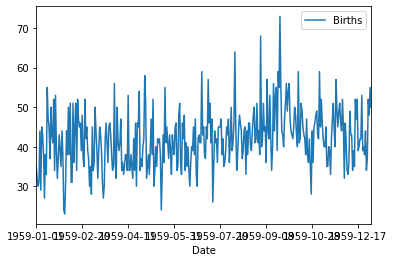

In [6]:
import pandas as pd
from matplotlib import pyplot
birth_series = pd.read_csv('../data/daily-total-female-births.csv', header=0, index_col=0)
birth_series.plot()
pyplot.show()


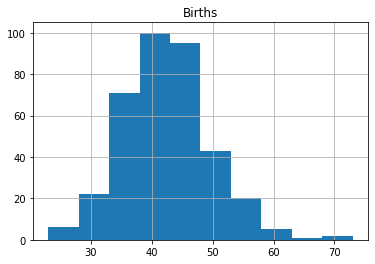

In [7]:
birth_series.hist()
pyplot.show()

### 而非平稳性时间序列的观测点 要么是有趋势性、季节性 或者 时间相关。 非平稳性的  摘要统计是随时间变化的  通常对于模型来说，你引入了一个“漂移”的概念  . 通常 用经典的时间序列， 和统计模型   去掉季节性和趋势性来预测 非平稳时间序列  是令人担忧的。

In [8]:
X = birth_series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


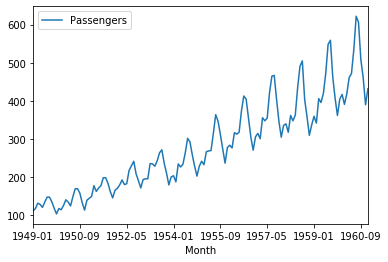

In [9]:
airline_series = pd.read_csv('../data/airline-passengers.csv', header=0, index_col=0)
airline_series.plot()
pyplot.show()

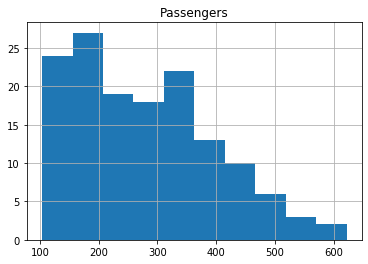

In [18]:
airline_series.hist()
pyplot.show()

In [10]:
X = airline_series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


### 单位根检验

图形观察方式很直观，但也很主观，不同的人对相同的图形，可能得出不同的结论。因此需要一个更加客观的统计方法来检验时间序列的平稳性，即单位根检验，常见的单位根检验方法有DF检验、ADF检验和PP检验，下面主要介绍如何使用Python进行ADF单位根检验。

单位根检验背后的动机 就是 看一个时间序列的趋势性有多强

原假设(H0) 存在单位根，时间序列是非平稳的，存在和时间相关的趋势性。  p-value > 0.05； 
H1 假设：原假设被推翻，时间序列是平稳的，不存在时间相关趋势性或者 季节性。 p-value <= 0.05

In [22]:
from statsmodels.tsa.stattools import adfuller

X = birth_series.values

## 此时，运行，是可以运行的，但是，如果你使用的是一个数组，其shape为（n,1)的，会出现ValueError: too many values to unpack (expected 2)的错误，此时，比如该数组为ary，可以加上ary.shape = (len(ary),)，将ary数组的列置为默认的空就可以了
X.shape = (len(X),)


result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [23]:
### 可以看到 结果是-4，负值越大 我们约倾向拒绝原假设，也就是我们的时间序列是平稳的。 从 统计上看 我们的-4  有1%的可能性是小于 - 3.449

In [24]:
from statsmodels.tsa.stattools import adfuller

X = airline_series.values

## 此时，运行，是可以运行的，但是，如果你使用的是一个数组，其shape为（n,1)的，会出现ValueError: too many values to unpack (expected 2)的错误，此时，比如该数组为ary，可以加上ary.shape = (len(ary),)，将ary数组的列置为默认的空就可以了
X.shape = (len(X),)


result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
